## Phase 1: Case

The [dataset](https://www.kaggle.com/arjoonn/missing-people) was uploaded by [ArjoonnSharma](https://www.kaggle.com/arjoonn) on Kaggle. It was originally extracted from India's National Crime Records Bureau.

Questions this project will target are:
1. What kinds of people are most vulnerable to go missing?
    * Based on age
    * Based on sex
    * Based on built
    * Based on presence of a responsible relative
2. Are there areas that need more police presence to reduce cases?
3. Are there significantly more people abducted away from their homes/relatives?

### Set up workspace

In [1]:
#Standard and visualization libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from jupyterthemes import jtplot
%matplotlib inline
jtplot.style(theme='oceans16')

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Inspect dataset

In [2]:
df = pd.read_csv('cleandata.csv')
df.head(3)

,Name,Gender,Relative,Address,AgeStart,AgeEnd,HeightStart,HeightEnd,Built,Date,Dist,State
0,JYOTI,Female,GEETA,", , E 129 A SHOK NAGAR PRIDAY MARKET CHOWK DE...",16,17,122.0,183.0,normalmedium,NaN,G.T.B. ENCLAVE/NORTH EAST,DELHI
1,ABHISHEK,Male,MUKE SHKUMAR,", , JHUGGI NO. N- 78/102, SHIVANAND SCHOOL SEW...",19,20,153.0,183.0,thin,NaN,PUNJABI BAGH/WEST,DEL
2,NaN,Male,RAJE SHKUMAR,", NO, 79, GALI NO. 3 KONDLI DELHI NEW A SHOK N...",19,20,153.0,183.0,thin,NaN,NEW ASHOK NAGAR/EAST,DE


In [3]:
df.shape

(2127, 12)

In [4]:
df.describe()

,AgeStart,AgeEnd,HeightStart,HeightEnd,Date
count,2127.000000,2127.000000,2094.000000,2094.000000,0.0
mean,25.962388,26.952515,168.523400,176.548233,NaN
std,14.698394,14.721309,314.559716,385.352640,NaN
min,1.000000,1.000000,3.000000,0.000000,NaN
25%,17.000000,18.000000,153.000000,92.000000,NaN
50%,22.000000,23.000000,153.000000,183.000000,NaN
75%,30.000000,31.000000,153.000000,183.000000,NaN
max,96.000000,97.000000,4664.000000,5578.000000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 12 columns):
Name           1560 non-null object
Gender         2010 non-null object
Relative       2125 non-null object
Address        2127 non-null object
AgeStart       2127 non-null int64
AgeEnd         2127 non-null int64
HeightStart    2094 non-null float64
HeightEnd      2094 non-null float64
Built          2115 non-null object
Date           0 non-null float64
Dist           2127 non-null object
State          1996 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 199.5+ KB


In [6]:
df['Gender'].value_counts()

Male      1334
Female     676
Name: Gender, dtype: int64

In [7]:
df['Relative'].value_counts().head()

            119
 SUNIT A      8
 POON AM      7
 REKH A       5
 SEEM A       5
Name: Relative, dtype: int64

In [8]:
df['Built'].value_counts()

normalmedium    996
thin            832
strong          244
fat              27
muscular         11
veryfat           4
verylanky         1
Name: Built, dtype: int64

In [9]:
df['Dist'].value_counts().head()

NARELA/OUTER DISTRICT        61
JAIT PUR/SOUTH- EAST         56
AMAN VIHAR/OUTER DISTRICT    56
KALYANPURI                   51
MEHRAULI                     50
Name: Dist, dtype: int64

In [10]:
df['State'].value_counts()

DELHI      1298
DE          250
D           139
DEL         100
EAS          66
SOUT         50
CENTRAL      42
CENTRA       17
DELH         14
NORT          5
SOUTH         5
NORTH         4
WEST          3
CENT          3
Name: State, dtype: int64

#### Observation
1. Original dataset has dimensions: 2127, 12.
2. Columns `Name`, `Relative`, `Address` and `Date` can be dropped.
3. District or state info can be extrated from `Address` to later compare relative address to location of incident.
4. Gender has null values but we can fill it based on similar rows.
5. Duration of missing case can also be derived from `Age Start` and `Age End`.
6. `Dist` stands for District.
7. There are unrealistic values in `HeightStart` and `HeightEnd` columns.

## Phase 2: Data Cleaning

### Removing unnecessary columns

In [11]:
df = df.drop(columns=['Name', 'Relative', 'Address', 'Date'], axis=1)
df.shape

(2127, 8)

### Rename Columns

In [12]:
df = df.rename(mapper={'Dist' : 'District'}, axis=1)
df.columns

Index([u'Gender', u'AgeStart', u'AgeEnd', u'HeightStart', u'HeightEnd',
       u'Built', u'District', u'State'],
      dtype='object')

### Location-related columns

In [13]:
#Generate random numbers to sample observations
random_numbers = np.random.randint(low=0, high=2126, size=3)
random_numbers

array([ 770,  902, 1098])

In [14]:
#Check location-related columns
for i in random_numbers:
    print('Index: %d' % i)
    print('District: %s' % df.loc[i]['District'])
    print('State: %s' % df.loc[i]['State'])
    print('')

Index: 770
District: ALIPUR/OUTER DISTRICT
State: DELHI

Index: 902
District: MADHU VIHAR/EAST
State: DEL

Index: 1098
District: SADAR BAZAR/NORTH
State: D



In [15]:
df['State'].value_counts()

DELHI      1298
DE          250
D           139
DEL         100
EAS          66
SOUT         50
CENTRAL      42
CENTRA       17
DELH         14
NORT          5
SOUTH         5
NORTH         4
WEST          3
CENT          3
Name: State, dtype: int64

In [16]:
df[df['State']=='DELHI']['District'].value_counts().head()

NARELA/OUTER DISTRICT         61
AMAN VIHAR/OUTER DISTRICT     56
JAIT PUR/SOUTH- EAST          56
NAND NAGRI/NORTH EAST         45
MANGOL PURI/OUTER DISTRICT    37
Name: District, dtype: int64

It appears the format for values in `District` column is

**District Name | Delimiter | District Location**

Let's check:

In [17]:
df['District'].str.contains('/').value_counts()

True     1932
False     195
Name: District, dtype: int64

There are cells without a delimeter. We can inspect what they have instead.

In [18]:
df[~df['District'].str.contains('/')]['District'].value_counts()

KALYANPURI            51
MEHRAULI              50
NABI KARIM            18
SHAKARPUR             15
ANAND PARBAT          11
PRASAD NAGAR          10
RANJIT NAGAR           8
SAFDARJUNG ENCLAVE     5
TIMARPUR               5
PATEL NAGAR            4
KOTWALI                4
CHANDNI MAHAL          3
JAMA MASJID            3
VIKASPURI              3
I.P.ESTATE             3
RAJINDER NAGAR         2
Name: District, dtype: int64

#### Fill in missing info

We can get the missing information from [MapsofIndia](https://www.mapsofindia.com/). They have details on `State` and `District`. We're only interested in grouping areas based on physical location, hence, New Delhi will be included in Central Delhi and Shahdara in East.

In [19]:
#Create mapping dictionary with researched values
district_states = {'KALYANPURI' : ['KALYANPURI/EAST', 'DELHI'], 
                   'MEHRAULI' : ['MEHRAULI/SOUTH WEST', 'DELHI'], 
                   'NABI KARIM' : ['NABI KARIM/CENTRAL', 'DELHI'], 
                   'SHAKARPUR' : ['SHAKARPUR/EAST', 'DELHI'], 
                   'ANAND PARBAT' : ['ANAND PARBAT/CENTRAL', 'DELHI'],
                   'PRASAD NAGAR' : ['PRASAD NAGAR/CENTRAL', 'DELHI'], 
                   'RANJIT NAGAR' : ['RANJIT NAGAR/CENTRAL', 'DELHI'], 
                   'SAFDARJUNG ENCLAVE' : ['SAFDARJUNG ENCLAVE/CENTRAL', 'DELHI'], 
                   'TIMARPUR' : ['TIMARPUR/NORTH', 'DELHI'], 
                   'PATEL NAGAR' : ['PATEL NAGAR/CENTRAL', 'DELHI'], 
                   'KOTWALI' : ['KOTWALI/NORTH', 'UTTAR PRADESH'], 
                   'CHANDNI MAHAL' : ['CHANDNI MAHAL/CENTRAL', 'DELHI'], 
                   'JAMA MASJID' : ['JAMA MASJID/CENTRAL', 'DELHI'], 
                   'VIKASPURI' : ['VIKASPURI/WEST', 'DELHI'], 
                   'I.P.ESTATE' : ['I.P.ESTATE/CENTRAL', 'DELHI'], 
                   'RAJINDER NAGAR' : ['RAJINDER NAGAR/CENTRAL', 'DELHI']}

In [20]:
for district_state in district_states:
    df['District'][df['District'].str.contains(district_state)] = district_states[district_state][0]
    df['State'][df['District'].str.contains(district_state)] = district_states[district_state][1]

In [21]:
#Check if there all entries now have delimiter
df[df['District'].str.contains('/')]['District'].count()

2127

#### Split `District` column to `District` and `Area`

In [22]:
#Split column into a new df
new_cols = df['District'].str.split('/', n=1, expand=True)
new_cols.head(3)

,0,1
0,G.T.B. ENCLAVE,NORTH EAST
1,PUNJABI BAGH,WEST
2,NEW ASHOK NAGAR,EAST


In [23]:
new_column_names = [u'Gender', u'AgeStart', u'AgeEnd', u'HeightStart', u'HeightEnd',
       u'Built', u'Old District', u'State', u'District', u'Area']

In [24]:
df = pd.concat([df, new_cols], axis=1, ignore_index=True)
df.shape

(2127, 10)

In [25]:
#Create a dictionary or column names
col_dict = dict(zip(df.columns, new_column_names)) ; col_dict

{0: u'Gender',
 1: u'AgeStart',
 2: u'AgeEnd',
 3: u'HeightStart',
 4: u'HeightEnd',
 5: u'Built',
 6: u'Old District',
 7: u'State',
 8: u'District',
 9: u'Area'}

In [26]:
#Rename columns
df = df.rename(mapper=col_dict, axis=1)

#Drop `Old District`
df = df.drop(columns=['Old District'], axis=1)

#Preview
df.head(3)

,Gender,AgeStart,AgeEnd,HeightStart,HeightEnd,Built,State,District,Area
0,Female,16,17,122.0,183.0,normalmedium,DELHI,G.T.B. ENCLAVE,NORTH EAST
1,Male,19,20,153.0,183.0,thin,DEL,PUNJABI BAGH,WEST
2,Male,19,20,153.0,183.0,thin,DE,NEW ASHOK NAGAR,EAST


#### Clean `State`

In [27]:
df['State'].value_counts()

DELHI            1494
DE                250
D                 134
DEL               100
DELH               14
UTTAR PRADESH       4
Name: State, dtype: int64

##### `DE`, `D`, `DEL`, `DELH` values

In [28]:
delhi_variations = ['DE', 'D', 'DEL', 'DELH']
df['District'][df['State'].isin(delhi_variations)].value_counts()

UTTAM NAGAR          41
NEW ASHOK NAGAR      35
KHYALA               32
GANDHI NAGAR         26
NEB SARAI            24
MADHU VIHAR          21
FARSH BAZAR          21
HAUZ KHAS            21
VASANT KUNJ SOUTH    19
KRISHNA NAGAR        19
HARI NAGAR           18
FATEHPUR BERI        18
SADAR BAZAR          18
VIVEK VIHAR          12
KASHMERI GATE        12
RAJOURI GARDEN       12
MIANWALI NAGAR       10
GEETA COLONY          9
ROOP NAGAR            8
MAYA PURI             8
PASCHIM VIHAR         8
MOTI NAGAR            8
KIRTI NAGAR           8
R. K. PURAM           7
TILAK NAGAR           7
LAHORI GATE           7
SUBZI MANDI           6
K.M. PUR              6
JANAK PURI            6
CIVIL LINES           6
GULABI BAGH           5
VASANT VIHAR          5
MALVIYA NAGAR         5
SAROJINI NAGAR        5
BARA HINDU RAO        4
ANAND VIHAR           3
PANDAV NAGAR          3
MAURICE NAGAR         3
PREET VIHAR           3
VASANT KUNJ NORTH     3
PUNJABI BAGH          2
NIHAL VIHAR     

This is a type due to manual data entry. DE, D, DEL, and DELH are the same as Delhi. Other than that, Gandhi Nagar is in Gujarat (West).

In [29]:
#Change values for Gandhi Nagar
df['District'][df['District'].str.contains('GANDHI NAGAR')] = 'GANDHINAGAR'
df['Area'][df['District'].str.contains('GANDHINAGAR')] = 'WEST'
df['State'][df['District'].str.contains('GANDHINAGAR')] = 'GUJURAT'

#Verify if changed
df[df['District'].str.find('GANDHINAGAR')==False].head(3)

,Gender,AgeStart,AgeEnd,HeightStart,HeightEnd,Built,State,District,Area
39,Female,23,24,153.0,183.0,normalmedium,GUJURAT,GANDHINAGAR,WEST
106,Female,15,16,153.0,31.0,normalmedium,GUJURAT,GANDHINAGAR,WEST
123,Female,15,16,153.0,31.0,strong,GUJURAT,GANDHINAGAR,WEST


In [30]:
#Change `DE` to `DELHI`
df['State'][df['State'].isin(delhi_variations)] = 'DELHI'

#Verify if changed
df['State'].value_counts()

DELHI            1966
GUJURAT            26
UTTAR PRADESH       4
Name: State, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 9 columns):
Gender         2010 non-null object
AgeStart       2127 non-null int64
AgeEnd         2127 non-null int64
HeightStart    2094 non-null float64
HeightEnd      2094 non-null float64
Built          2115 non-null object
State          1996 non-null object
District       2127 non-null object
Area           2127 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 149.6+ KB


Only 1996 out of expected 2127 rows have `State` values.

In [32]:
#Check which districts have no `State` values
not_nulls = ['DELHI', 'GUJURAT', 'UTTAR PRADESH']
df['District'][~df['State'].isin(not_nulls)].value_counts()

RANHOLA          32
BURARI           21
MUNDKA           20
GHAZIPUR         20
SARAI ROHILLA    10
KAROL BAGH        8
PAHAR GANJ        6
DARYA GANJ        4
SOUTH CAMPUS      3
NANGLOI           3
D.B.G. ROAD       2
LODI COLONY       1
KALKAJI           1
Name: District, dtype: int64

All these districts are also in Delhi.

In [33]:
#Change values
df['State'][~df['State'].isin(not_nulls)] = 'DELHI'

In [34]:
#Verify if changed (Delhi had 1966 instances last time we checked)
df['State'].value_counts()

DELHI            2097
GUJURAT            26
UTTAR PRADESH       4
Name: State, dtype: int64

#### Clean `Area`

In [35]:
df['Area'].value_counts()

OUTER DISTRICT     342
WEST               247
EAST               231
SOUTH WEST         181
NORTH EAST         180
SOUTH- EAST        166
NORTH WEST         152
SOUTH              120
NORTH              109
CENTRAL             92
NOR EAST            69
SOU WEST            46
RAILWAYS METRO      44
NORT EAST           31
NEW DELHI           30
OUT DISTRICT        27
SOUT EAST           20
O DISTRICT          19
GOKULPURI/ EAST     12
RAILWA METRO         4
RAILWAY METRO        2
SO EAST              2
PA AIRPORT           1
Name: Area, dtype: int64

**Next steps in cleaning this column:**
1. Correct typographical errors
2. Handle other values with relative location (ie: Outer District)
3. Handle values pertaining to specific areas (ie: PA Airport)

##### Correct typographical errors

In [36]:
#Create a dictionary of new values
typo_dict = {'SOUTH- EAST' : 'SOUTH EAST', 'NOR EAST' : 'NORTH EAST', 
             'SOU WEST' : 'SOUTH WEST', 'NORT EAST' : 'NORTH EAST', 
             'NEW DELHI' : 'CENTRAL', 'SOUT EAST' : 'SOUTH EAST', 
             'SO EAST' : 'SOUTH EAST'}

In [37]:
#Transform values based on dictionary
df['Area'][df['Area'].isin(typo_dict)] = df['Area'].map(typo_dict)

In [38]:
#Verify if changed
df['Area'].value_counts()

OUTER DISTRICT     342
NORTH EAST         280
WEST               247
EAST               231
SOUTH WEST         227
SOUTH EAST         188
NORTH WEST         152
CENTRAL            122
SOUTH              120
NORTH              109
RAILWAYS METRO      44
OUT DISTRICT        27
O DISTRICT          19
GOKULPURI/ EAST     12
RAILWA METRO         4
RAILWAY METRO        2
PA AIRPORT           1
Name: Area, dtype: int64

##### Handle `OUTER DISTRICT`, `OUT DISTRICT`, `O DISTRICT` values

In [39]:
#Create list of area values to replace
outer_list = ['OUTER DISTRICT', 'OUT DISTRICT', 'O DISTRICT']

###### `OUTER DISTRICT`

In [40]:
#Check which rows have `OUTER DISTRICT`
df['District'][df['Area'].isin(outer_list)].value_counts()

NARELA             61
AMAN VIHAR         56
MANGOL PURI        37
SHAHBAD DAIRY      36
VIJAY VIHAR        33
SAMAIPUR BADLI     31
SULTANPURI         27
ALIPUR             23
KANJHAWALA         19
BAWANA             18
BEGUM PUR          15
NORTH ROHINI       13
K.N. KATJU MARG     9
NANGLOI             5
SOUTH ROHINI        3
PRASHANT VIHAR      2
Name: District, dtype: int64

In [41]:
#Create a dictionary of new values
outer_dict = {'NARELA' : 'NORTH', 'AMAN VIHAR' : 'CENTRAL', 
              'MANGOL PURI' : 'CENTRAL', 'SHAHBAD DAIRY' : 'CENTRAL', 
              'VIJAY VIHAR' : 'CENTRAL', 'SAMAIPUR BADLI' : 'CENTRAL', 
              'ALIPUR' : 'NORTH WEST', 'BAWANA' : 'NORTH WEST', 
              'BEGUM PUR' : 'NORTH WEST', 'NORTH ROHINI' : 'NORTH WEST', 
              'K.N. KATJU MARG' : 'CENTRAL', 'NANGLOI' : 'WEST', 
              'SOUTH ROHINI' : 'NORTH WEST', 'PRASHANT VIHAR' : 'CENTRAL', 
              'SULTANPURI' : 'CENTRAL', 'KANJHAWALA' : 'NORTH WEST'}

In [42]:
#Transform values based on dictionary
df['Area'][df['Area'].isin(outer_list)] = df['District'].map(outer_dict)

In [43]:
#Verify if all were changed
df['Area'].value_counts()

CENTRAL            353
NORTH EAST         280
WEST               252
NORTH WEST         243
EAST               231
SOUTH WEST         227
SOUTH EAST         188
NORTH              170
SOUTH              120
RAILWAYS METRO      44
GOKULPURI/ EAST     12
RAILWA METRO         4
RAILWAY METRO        2
PA AIRPORT           1
Name: Area, dtype: int64

##### Handle infrastructure-specific entries
Based on quick research Gokulpuri, Railway/s Metro are railway stations. `CRIME RAILWAY` doesn't seem to be an actual railway station, but looking into it shows a number of articles about crimes committed in railway stations. Next steps are:
1. drop `CRIME RAILWAY` rows
2. create another bool column for incidents in and not in railway stations
3. transform these values in remaining rows to district names

**NOTE:** Values for the new column will be filled in later

###### 1. drop CRIME RAILWAY rows

In [44]:
#Inspect shape
df.shape

(2127, 9)

In [45]:
#List rows to drop
crime_drop = df[df['District']=='CRIME RAILWAY'].index.tolist() ; crime_drop

[210, 661, 1282, 1322]

In [46]:
#Drop rows with `CRIME RAILWAY`
df = df.drop(crime_drop, axis=0)

#Check if shape changed
df.shape

(2123, 9)

###### 2. create another bool column for incidents in and not in railway stations

In [47]:
#Create list of railways
spec_list = ['GOKULPURI/ EAST', 'RAILWA METRO', 'RAILWAY METRO', 'RAILWAYS METRO']

In [48]:
df['Railway'] = df['Area'].isin(spec_list)
df['Railway'].value_counts()

False    2065
True       58
Name: Railway, dtype: int64

###### 3. transform these values in remaining rows to district names

In [49]:
#Add item to list
spec_list.append('PA AIRPORT')

In [50]:
#Check district values in rows
df['District'][df['Area'].isin(spec_list)].value_counts()

OLD DELHI (DELHI MAIN) RLY. STN.    18
NEW DELHI RLY. STN.                 18
YAMUNA VHR                          12
HAZRAT NIZAMUDDIN RLY STN            5
IGI AIRPORT METRO                    2
ANAND VIHAR RLY STN                  2
NIZAMUDDIN RLY STN                   1
I.G.I.AIRPORT                        1
Name: District, dtype: int64

In [51]:
#Create a dictionary of new values
spec_dict = {'YAMUNA VHR' : 'NORTH EAST', 
             'OLD DELHI (DELHI MAIN) RLY. STN.' : 'CENTRAL',
             'NEW DELHI RLY. STN.' : 'CENTRAL', 
             'HAZRAT NIZAMUDDIN RLY STN' : 'SOUTH', 
             'IGI AIRPORT METRO' : 'CENTRAL',
             'ANAND VIHAR RLY STN' : 'EAST', 
             'NIZAMUDDIN RLY STN' : 'SOUTH', 
             'I.G.I.AIRPORT' : 'CENTRAL', }

In [52]:
#Transform values based on dictionary
df['Area'][df['Area'].isin(spec_list)] = df['District'].map(spec_dict)

In [53]:
#Verify if changed
df['Area'].value_counts()

CENTRAL       392
NORTH EAST    292
WEST          252
NORTH WEST    243
EAST          233
SOUTH WEST    227
SOUTH EAST    188
NORTH         170
SOUTH         126
Name: Area, dtype: int64

### Filling in values in new column `Railway`
Cleartrip has a information about Indian Railway Stations [here](https://www.cleartrip.com/trains/stations/list). We already extracted it as a csv file named **indian_railway_stations**.

In [54]:
stations = pd.read_csv('indian_railway_stations.csv')

In [55]:
#Get list of station names
stations_list = stations['Station name']

#Capitalize all values
stations_list = stations_list.str.upper().str.replace(' ', '').str.replace('.', '')

In [56]:
#Add a temp column in df with transformed strings (District values)
df['Temp District'] = df['District'].str.upper().str.replace(' ', '').str.replace('.', '')

In [57]:
#Check values in bool column
df['Railway'].value_counts()

False    2065
True       58
Name: Railway, dtype: int64

In [58]:
#Evaluate bool column
df['Railway'] = (df['Railway']) | (df['Temp District'].isin(stations_list))

In [59]:
#Check changed values
df['Railway'].value_counts()

False    1884
True      239
Name: Railway, dtype: int64

In [60]:
#Drop temp district column
df = df.drop(columns=['Temp District'], axis=1)

df.shape

(2123, 10)

### Filling in gender information

In [61]:
#Capitalize all values
df['Gender'] = df['Gender'].str.upper()

In [62]:
#Check number of null values
df['Gender'].isnull().value_counts()

False    2006
True      117
Name: Gender, dtype: int64

In [63]:
#Get reference values based on area
df.groupby('Area')['Gender'].apply(pd.value_counts)

Area              
CENTRAL     MALE      255
            FEMALE    118
EAST        MALE      137
            FEMALE     78
NORTH       MALE      110
            FEMALE     50
NORTH EAST  MALE      190
            FEMALE     89
NORTH WEST  MALE      156
            FEMALE     77
SOUTH       MALE       76
            FEMALE     44
SOUTH EAST  MALE      113
            FEMALE     64
SOUTH WEST  MALE      132
            FEMALE     79
WEST        MALE      161
            FEMALE     77
Name: Gender, dtype: int64

In all areas, there are more cases of Male disappearances.

In [64]:
#Replace values with Male
df['Gender'][df['Gender'].isnull()] = 'MALE'

In [65]:
#Check number of null values is now zero
df['Gender'].isnull().value_counts()

False    2123
Name: Gender, dtype: int64

### Fixing `Age` columns
`AgeStart` will be retained while `AgeEnd` will just be used to compute duration per incident. Both columns are already complete but we'll check for unrealistic values.

In [66]:
#Check num and max values
df[['AgeStart', 'AgeEnd']].describe()

,AgeStart,AgeEnd
count,2123.000000,2123.000000
mean,25.981630,26.971738
std,14.704925,14.727885
min,1.000000,1.000000
25%,17.000000,18.000000
50%,22.000000,23.000000
75%,30.000000,31.000000
max,96.000000,97.000000


In [67]:
#Add new column for duration of incident
df['Duration'] = df['AgeEnd'] - df['AgeStart']

In [68]:
df.Duration.value_counts()

 1    2105
 2       5
 0       4
-4       3
-3       2
-2       2
 5       1
 4       1
Name: Duration, dtype: int64

While `Duration` would have been a useful feature, the cases are heavily imbalanced and there are 7 unexpected negative values.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2123 entries, 0 to 2126
Data columns (total 11 columns):
Gender         2123 non-null object
AgeStart       2123 non-null int64
AgeEnd         2123 non-null int64
HeightStart    2090 non-null float64
HeightEnd      2090 non-null float64
Built          2111 non-null object
State          2123 non-null object
District       2123 non-null object
Area           2123 non-null object
Railway        2123 non-null bool
Duration       2123 non-null int64
dtypes: bool(1), float64(2), int64(3), object(5)
memory usage: 184.5+ KB


### Fixing `Height` columns
We already know there are unrealistically high and low values, and missing from when we inspected the dataset.

#### Handle missing values

In [70]:
#Look at rows with missing values
df[df['HeightStart'].isnull()].head()

,Gender,AgeStart,AgeEnd,HeightStart,HeightEnd,Built,State,District,Area,Railway,Duration
112,FEMALE,8,9,NaN,NaN,normalmedium,DELHI,SUBZI MANDI,NORTH,True,1
115,FEMALE,5,1,NaN,NaN,normalmedium,DELHI,INDER PURI,SOUTH WEST,False,-4
175,MALE,5,6,NaN,NaN,strong,DELHI,JAIT PUR,SOUTH EAST,False,1
222,FEMALE,4,6,NaN,NaN,normalmedium,DELHI,SHALIMAR BAGH,NORTH WEST,False,2
225,FEMALE,5,2,NaN,NaN,thin,DELHI,OLD DELHI (DELHI MAIN) RLY. STN.,CENTRAL,True,-3


In [71]:
print('Min: %d' % df['AgeStart'][df['HeightStart'].isnull()].min())
print('Max: %d' % df['AgeStart'][df['HeightStart'].isnull()].max())

Min: 4
Max: 8


Not all rows have matching `AgeStart` and `AgeEnd` values. But only looking at `AgeStart`, the range is 4 to 8.

Substitute values for height can be derived from the mean of height for the same age range.

In [72]:
#Get substitute value
bool_mask = (~df['HeightStart'].isnull()) & (df['AgeStart']>=4) & (df['AgeStart']<=8)
sub_height = df['HeightStart'][bool_mask].mean() ; sub_height

86.23255813953489

In [73]:
#Fill values
df['HeightStart'][df['HeightStart'].isnull()] = sub_height

#### Handle unrealistic values

In [74]:
df['HeightStart'].value_counts().sort_index()

4.000000          1
5.000000          9
31.000000         4
61.000000        25
86.232558        33
92.000000        60
122.000000      262
150.000000        1
152.000000        2
153.000000     1666
163.000000        1
170.000000        1
183.000000       45
336.000000        1
519.000000        1
1860.000000       1
4664.000000      10
Name: HeightStart, dtype: int64

In [75]:
#Check low and high values
unreal = df[(df['HeightStart']<10.0) | (df['HeightStart']>183.0)] ; unreal.head()

,Gender,AgeStart,AgeEnd,HeightStart,HeightEnd,Built,State,District,Area,Railway,Duration
5,MALE,47,48,5.0,6.0,thin,DELHI,JAIT PUR,SOUTH EAST,False,1
18,FEMALE,26,27,4664.0,5578.0,normalmedium,DELHI,DARYA GANJ,CENTRAL,False,1
40,MALE,10,11,1860.0,2805.0,thin,DELHI,NAND NAGRI,NORTH EAST,False,1
336,FEMALE,16,17,5.0,2.0,normalmedium,DELHI,DABRI,SOUTH WEST,False,1
368,FEMALE,17,18,519.0,549.0,thin,DELHI,NARELA,NORTH,True,1


Based on the ages per row, height was not mistakenly encoded in feet unit instead of cm. Otherwise, there wouldn't be around 1 unit of change for each rows. We decide to drop these instead.

In [76]:
#Put indices in list
unreal_rows = unreal.index.tolist()

In [77]:
#Drop rows with unrealistic values
df = df.drop(unreal_rows, axis=0)

#Check if shape changed
df.shape

(2100, 11)

### Ordering `Built`
It makes sense to order it by body mass.

#### Handle missing values

In [78]:
df[df['Built'].isnull()].head()

,Gender,AgeStart,AgeEnd,HeightStart,HeightEnd,Built,State,District,Area,Railway,Duration
53,FEMALE,18,19,122.0,244.0,NaN,DELHI,TILAK MARG,CENTRAL,False,1
63,MALE,6,7,92.0,61.0,NaN,DELHI,NEW USMANPUR,NORTH EAST,False,1
157,FEMALE,18,19,153.0,61.0,NaN,DELHI,OLD DELHI (DELHI MAIN) RLY. STN.,CENTRAL,True,1
729,MALE,19,20,153.0,183.0,NaN,DELHI,SHAKARPUR,EAST,False,1
1374,MALE,39,40,153.0,153.0,NaN,DELHI,NANGLOI,WEST,True,1


We can use row's Gender and AgeStart to derive substitute values.

In [79]:
#Get pairs
gender_age = zip(df['Gender'][df['Built'].isnull()], df['AgeStart'][df['Built'].isnull()])

In [80]:
#Derive substitute values
builts = []
for pair in gender_age:
    mask = (df['Gender']==pair[0]) & (df['AgeStart']==pair[1])
    builts.append(df['Built'].value_counts().argmax())
    
builts

['normalmedium',
 'normalmedium',
 'normalmedium',
 'normalmedium',
 'normalmedium',
 'normalmedium',
 'normalmedium',
 'normalmedium',
 'normalmedium']

They're all normalmedium so it's easier to fill values/

In [81]:
#Fill values
df['Built'][df['Built'].isnull()] = 'normalmedium'

In [82]:
#Check values
df['Built'].value_counts()

normalmedium    990
thin            825
strong          243
fat              26
muscular         11
veryfat           4
verylanky         1
Name: Built, dtype: int64

#### Convert categorical feature to numeric
Based on increasing pody mass based on description

In [83]:
#Create mapping dictionary
built_dict = {'verylanky' : 1, 'thin' : 2, 'normalmedium' : 3, 
              'muscular' : 4, 'strong' : 5, 'fat' : 6, 'veryfat' : 7}

In [84]:
#Convert values
df['Built'] = df['Built'].map(built_dict)

In [85]:
#Recheck values
df['Built'].value_counts()

3    990
2    825
5    243
6     26
4     11
7      4
1      1
Name: Built, dtype: int64

### Removing unnecessary columns

In [86]:
df = df.drop(columns=['AgeEnd', 'HeightEnd', 'Duration'], axis=1)

In [87]:
#Rename columns
df = df.rename(mapper={'AgeStart' : 'Age', 'HeightStart' : 'Height'}, axis=1)

In [88]:
df.shape

(2100, 8)

In [89]:
df.head()

,Gender,Age,Height,Built,State,District,Area,Railway
0,FEMALE,16,122.0,3,DELHI,G.T.B. ENCLAVE,NORTH EAST,False
1,MALE,19,153.0,2,DELHI,PUNJABI BAGH,WEST,False
2,MALE,19,153.0,2,DELHI,NEW ASHOK NAGAR,EAST,False
3,MALE,24,153.0,2,DELHI,KALYANPURI,EAST,False
4,MALE,21,153.0,2,DELHI,WELCOME,NORTH EAST,False


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 0 to 2126
Data columns (total 8 columns):
Gender      2100 non-null object
Age         2100 non-null int64
Height      2100 non-null float64
Built       2100 non-null int64
State       2100 non-null object
District    2100 non-null object
Area        2100 non-null object
Railway     2100 non-null bool
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 133.3+ KB


We've confirmed that the dataset is now clean and complete.

In [91]:
#Save clean data to csv
df.to_csv('missing-persons-clean.csv')

## Phase 3: Exploratory Data Analysis (EDA)

Text(0.5,0,'Age Distribution Male vs Female')

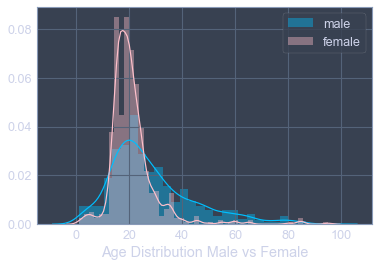

In [92]:
#Visualizing age distribution per gender
male = sns.distplot(df['Age'][df['Gender']=='MALE'], color='deepskyblue', label='male')
female = sns.distplot(df['Age'][df['Gender']=='FEMALE'], color='pink', label='female')
plt.legend()
plt.xlabel('Age Distribution Male vs Female')

While there are more Male disappearances in total, their distribution is much more spread out than Female's. For Females, there's a sharp peak at ages 17-24.

Text(0.5,0,'Height Distribution Male vs Female')

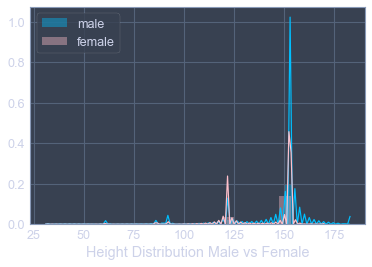

In [93]:
#Visualizing height distribution per gender
male = sns.distplot(df['Height'][df['Gender']=='MALE'], color='deepskyblue', label='male')
female = sns.distplot(df['Height'][df['Gender']=='FEMALE'], color='pink', label='female')
plt.legend()
plt.xlabel('Height Distribution Male vs Female')

In [94]:
#Inverse previous dictionary
inv_built_dict = {v: k for k, v in built_dict.iteritems()}

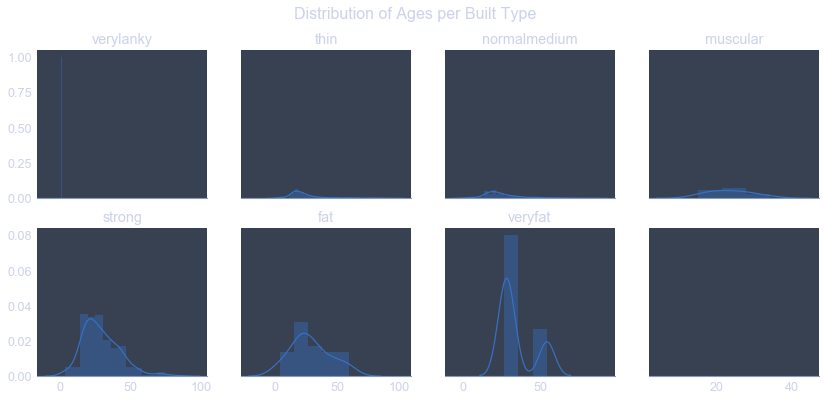

In [95]:
#Generate subplots
fig, axes = plt.subplots(2, 4, figsize=(14,6), sharex='col', sharey='row')
fig.suptitle('Distribution of Ages per Built Type', fontsize=16)
for i in range(7):
    built_num = i+1
    built_cat = inv_built_dict[i+1]
    sns.distplot(df['Age'][df['Built']==built_num], ax=axes[(i/4),(i%4)])
    axes[(i/4),(i%4)].set_title(str(built_cat))
    axes[(i/4),(i%4)].set_xlabel('')
    axes[(i/4),(i%4)].grid()
plt.grid(False)
sns.despine(left=True)

Text(0.5,0,'Age Distribution City Center vs Not')

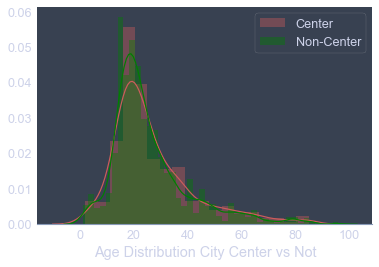

In [96]:
#Visualizing cases between city center and outside
sns.distplot(df['Age'][df['Area']=='CENTRAL'], color='indianred', label='Center')
sns.distplot(df['Age'][df['Area']!='CENTRAL'], color='green', label='Non-Center')
sns.despine(left=True)
plt.grid(False)
plt.legend()
plt.xlabel('Age Distribution City Center vs Not')

The distributions are similar in shape. The difference is that there are slightly more incidents outside the city center for the same ages previously: 17-24.

Text(0.5,0,'Age Distribution City Center vs Not')

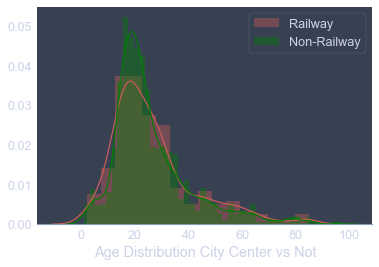

In [97]:
#Visualizing cases between city center and outside
sns.distplot(df['Age'][df['Railway']==True], color='indianred', label='Railway')
sns.distplot(df['Age'][df['Railway']==False], color='green', label='Non-Railway')
sns.despine(left=True)
plt.grid(False)
plt.legend()
plt.xlabel('Age Distribution City Center vs Not')

In [98]:
#Check if there are more instances per district
railway = float(df['District'][df['Railway']==True].nunique()) / (df['District'][df['Railway']==True].count())
non_railway = float(df['District'][df['Railway']!=True].nunique()) / (df['District'][df['Railway']!=True].count())

railway - non_railway

-0.002334743907777617

Contrary to hypothesis, the non-railways are more likely to have missing persons cases. However, the difference is insignificant.

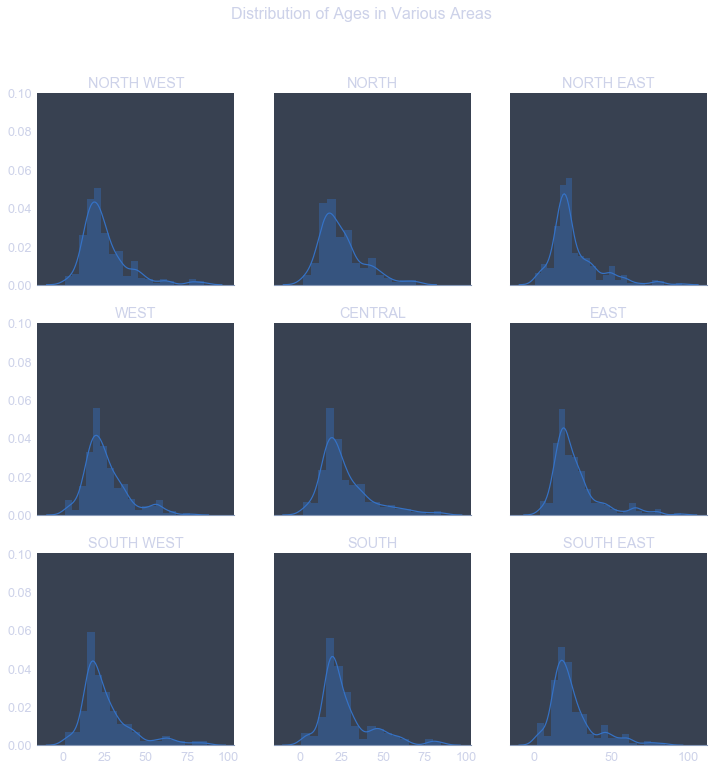

In [99]:
#Area values to list
areas = ['NORTH WEST', 'NORTH', 'NORTH EAST', 'WEST', 'CENTRAL', 'EAST', 
         'SOUTH WEST', 'SOUTH', 'SOUTH EAST']

fig, axes = plt.subplots(3, 3, figsize=(12,12), sharex='col', sharey='row')
fig.suptitle('Distribution of Ages in Various Areas', fontsize=16)
for i in range(9):
    area = areas[i]
    sns.distplot(df['Age'][df['Area']==area], ax=axes[(i/3),(i%3)])
    axes[(i/3),(i%3)].set_title(str(area))
    axes[(i/3),(i%3)].set_xlabel('')
    axes[(i/3),(i%3)].set_ylim(0,.1)
    axes[(i/3),(i%3)].grid()
plt.grid(False)
sns.despine(left=True)

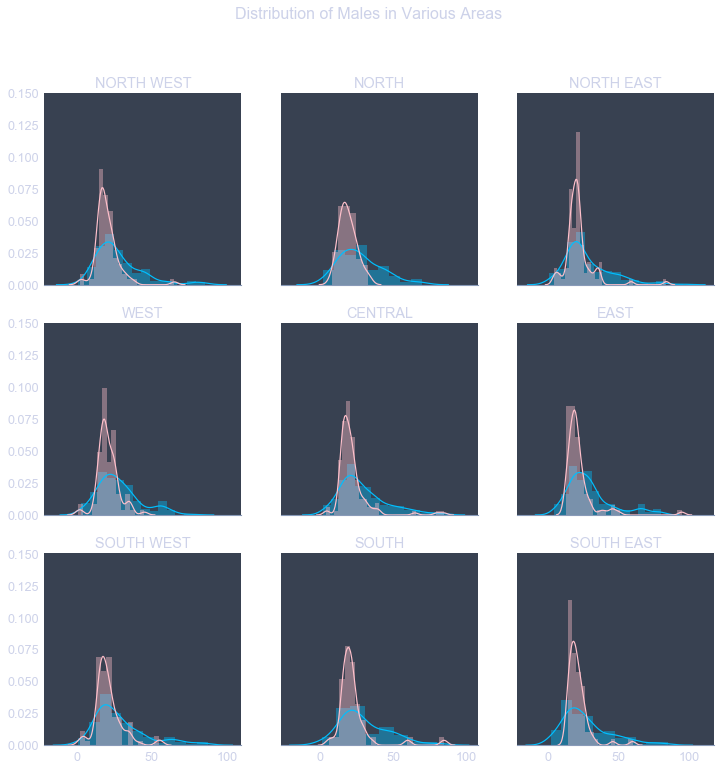

In [100]:
#Area values to list
fig, axes = plt.subplots(3, 3, figsize=(12,12), sharex='col', sharey='row')
fig.suptitle('Distribution of Males in Various Areas', fontsize=16)
for i in range(9):
    area = areas[i]
    sns.distplot(df['Age'][(df['Area']==area) & (df['Gender']=='MALE')], color='deepskyblue', ax=axes[(i/3),(i%3)])
    sns.distplot(df['Age'][(df['Area']==area) & (df['Gender']=='FEMALE')], color='pink', ax=axes[(i/3),(i%3)])
    axes[(i/3),(i%3)].set_title(str(area))
    axes[(i/3),(i%3)].set_xlabel('')
    axes[(i/3),(i%3)].set_ylim(0,.15)
    axes[(i/3),(i%3)].grid()
plt.grid(False)
sns.despine(left=True)

## Phase 4: Principal Component Analysis (PCA)
**Steps:**
1. Translate all features to numeric
2. Scale dataset
3. Perform analysis
4. Visualize clusters

### Import preprocessing and PCA libraries

In [101]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d

### Translate all features to numeric
Machines can only understand data reduced into numbers. To prepare data for modelling, we need to convert categorical features (ie: District) to numeric.

In [102]:
df_num = df.copy()

In [103]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 0 to 2126
Data columns (total 8 columns):
Gender      2100 non-null object
Age         2100 non-null int64
Height      2100 non-null float64
Built       2100 non-null int64
State       2100 non-null object
District    2100 non-null object
Area        2100 non-null object
Railway     2100 non-null bool
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 133.3+ KB


In [104]:
#Create mappers for Gender, State, Area
gender_m = {'MALE' : 0, 'FEMALE' : 1}
state_m = {'DELHI' : 0, 'GUJURAT' : 1, 'UTTAR PRADESH' : 2}
area_m = dict(zip(areas, range(9)))
railway_m = {False : 0, True : 1}

In [105]:
#Transform values to numeric
df_num['Gender'] = df_num['Gender'].map(gender_m)
df_num['State'] = df_num['State'].map(state_m)
df_num['Area'] = df_num['Area'].map(area_m)
df_num['Railway'] = df_num['Railway'].map(railway_m)

In [106]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 0 to 2126
Data columns (total 8 columns):
Gender      2100 non-null int64
Age         2100 non-null int64
Height      2100 non-null float64
Built       2100 non-null int64
State       2100 non-null int64
District    2100 non-null object
Area        2100 non-null int64
Railway     2100 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 147.7+ KB


### Scale dataset
We want the features to be on the same range so that the machine will not be biased towards bigger numbers. In this case, `Ditrict`'s max value is 167, way off from max values in others.

<br/>

We are using MinMaxScaler to do this. MinMaxScaler rescales the data set such that all feature values are in the range [0, 1].

<br/>

More info [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [107]:
#We've already tested some of the code below
#Distrit has too much variance that removing it improves PCA's explained
#variance significantly (from 72% to 85%)
df_num = df_num.drop(columns=['District'], axis=1)

In [108]:
df_num.describe()

,Gender,Age,Height,Built,State,Area,Railway
count,2100.000000,2100.00000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,0.316667,26.00381,145.666035,2.887619,0.016190,3.764762,0.110000
std,0.465287,14.73058,19.780063,0.996296,0.140525,2.376215,0.312964
min,0.000000,1.00000,31.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,17.00000,153.000000,2.000000,0.000000,2.000000,0.000000
50%,0.000000,22.00000,153.000000,3.000000,0.000000,4.000000,0.000000
75%,1.000000,30.25000,153.000000,3.000000,0.000000,6.000000,0.000000
max,1.000000,96.00000,183.000000,7.000000,2.000000,8.000000,1.000000


In [109]:
#Scale data
scaler = MinMaxScaler()
scaler.fit(df_num)
df_scaled = scaler.transform(df_num)

#Create a new df with scaled data
df_scaled = pd.DataFrame(df_scaled, index=df_num.index.copy(), 
                         columns=df_num.columns.copy())

#Describe new df
df_scaled.describe()

,Gender,Age,Height,Built,State,Area,Railway
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,0.316667,0.263198,0.754382,0.314603,0.008095,0.470595,0.110000
std,0.465287,0.155059,0.130132,0.166049,0.070262,0.297027,0.312964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.168421,0.802632,0.166667,0.000000,0.250000,0.000000
50%,0.000000,0.221053,0.802632,0.333333,0.000000,0.500000,0.000000
75%,1.000000,0.307895,0.802632,0.333333,0.000000,0.750000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Perform Analysis

In [110]:
#Get the first 3 PCA components only
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_scaled)

#Output of PCA is a 3-dimensional array
principalComponents 

#Put array into a neat DataFrame
pca_df = pd.DataFrame(data = principalComponents, 
                      columns = ['PC 1', 'PC 2', 'PC 3'])  

pca_df.head()

,PC 1,PC 2,PC 3
0,0.686254,0.049775,-0.255937
1,-0.306427,-0.061337,-0.139568
2,-0.297489,-0.185814,0.076822
3,-0.301925,-0.186371,0.078128
4,-0.312671,0.000679,-0.247240


In [111]:
explained_var_ratio = pca.explained_variance_ratio_
explained_var = pca.explained_variance_ratio_.sum() * 100
print('Given this value, it can be said that %.2f%s of the variance of our data is explained by these 3 Principal Components' % (explained_var, '%'))

Given this value, it can be said that 84.90% of the variance of our data is explained by these 3 Principal Components


In [112]:
pca.components_

array([[ 0.99494557, -0.08428787, -0.01210012, -0.0175488 ,  0.00376921,
         0.03575367, -0.03509938],
       [ 0.04726742, -0.01059275, -0.01209512, -0.00717563, -0.00103623,
        -0.49790861,  0.86576079],
       [-0.0107949 ,  0.02482198,  0.00501694,  0.02656693, -0.01977619,
         0.8655588 ,  0.49895213]])

In [113]:
#Dump components relations with features:
pd.DataFrame(pca.components_,columns=df_scaled.columns,index=['PC 1', 'PC 2', 'PC 3'])

,Gender,Age,Height,Built,State,Area,Railway
PC 1,0.994946,-0.084288,-0.012100,-0.017549,0.003769,0.035754,-0.035099
PC 2,0.047267,-0.010593,-0.012095,-0.007176,-0.001036,-0.497909,0.865761
PC 3,-0.010795,0.024822,0.005017,0.026567,-0.019776,0.865559,0.498952


### Visualize projection for 3 PCA

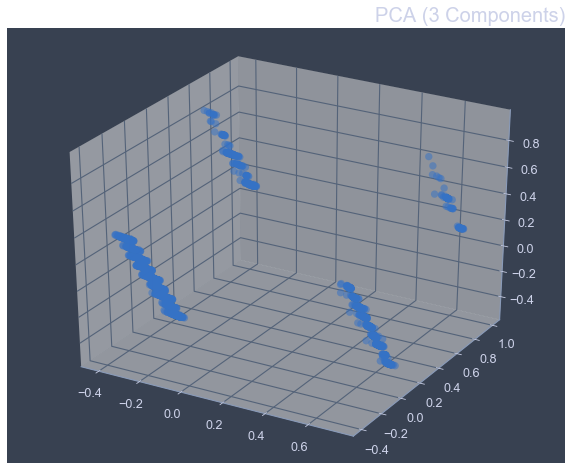

In [114]:
#Set up figure object
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.set_title('PCA (3 Components)', fontsize=20, loc='right')

#Assign PCA on x, y, z axes
xdata = pca_df['PC 1']
ydata = pca_df['PC 2']
zdata = pca_df['PC 3']

#Plot
ax.scatter3D(xdata, ydata, zdata, s=50, alpha=0.5, cmap='hot')

Visually inspecting the projection, there are 4 distinct clusters. We'll perform further tests to verufy this.

# Phase 5: Clustering

### Import machine learning libraries

In [115]:
#Clustering
from sklearn.cluster import KMeans

### Find the optimal k via elbow method

Text(0,0.5,'Score')

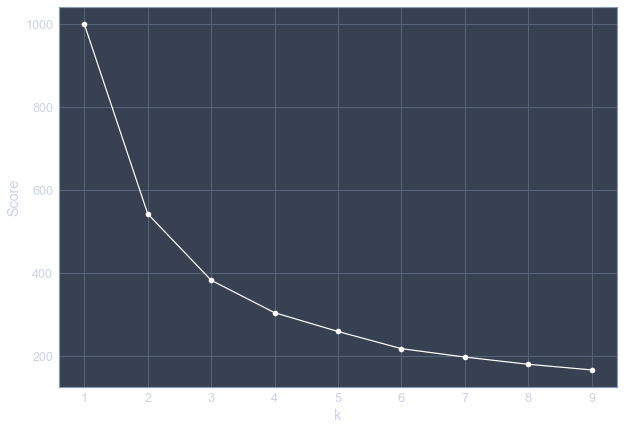

In [116]:
#Set range for k
range_n_clusters= range(1,10)

#Set an empty list to store the SSE values for each cluster
scores = []

# Iterate over cluster size options
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=30) 
    kmeans.fit(df_scaled)
    score = kmeans.inertia_ #inertia is sum of squared errors
    scores.append(score)
    
#Plot the results
plt.figure(figsize=(10,7))
plt.plot(range_n_clusters, np.abs(scores), marker='o', c='white')
plt.xlabel("k")
plt.ylabel("Score")

Elbow is at around 4-6 but we'll stick with 4 because it already confirms previous assumption.

### Run K Means (n_clusters=4)

In [117]:
#Instantiate the Algorithm
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=1)

#Fit to the data
kmeans.fit(df_scaled)

#Output of K-Means is the cluster label
k4_labels = kmeans.labels_

#Attach labels to a new copy of original DataFrame
df_k4 = df.copy()
df_k4['Label'] = k4_labels

#View the dataset
df_k4.head()

,Gender,Age,Height,Built,State,District,Area,Railway,Label
0,FEMALE,16,122.0,3,DELHI,G.T.B. ENCLAVE,NORTH EAST,False,2
1,MALE,19,153.0,2,DELHI,PUNJABI BAGH,WEST,False,1
2,MALE,19,153.0,2,DELHI,NEW ASHOK NAGAR,EAST,False,3
3,MALE,24,153.0,2,DELHI,KALYANPURI,EAST,False,3
4,MALE,21,153.0,2,DELHI,WELCOME,NORTH EAST,False,1


In [118]:
#Check for balance between classes
df_k4['Label'].value_counts().sort_index()

0    231
1    573
2    600
3    696
Name: Label, dtype: int64

Cluster 3 is smaller than others but we can work with that.

### Cluster Analysis

In [119]:
clusters = range(4)

#### Age

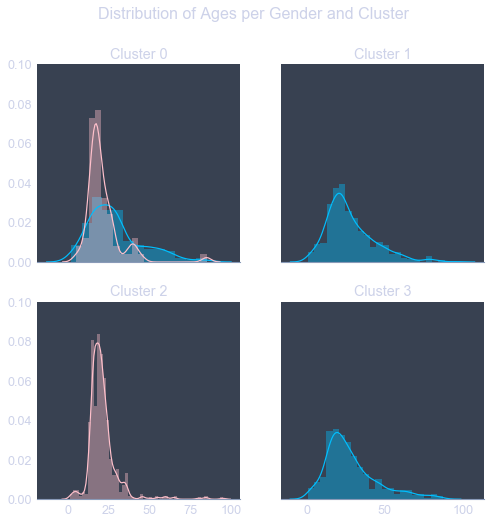

In [120]:
fig, axes = plt.subplots(2, 2, figsize=(8,8), sharex='col', sharey='row')
fig.suptitle('Distribution of Ages per Gender and Cluster', fontsize=16)
for i in clusters:
    mask_m = (df_k4['Gender']=='MALE') & (df_k4['Label']==i)
    mask_f = (df_k4['Gender']=='FEMALE') & (df_k4['Label']==i)
    sns.distplot(df['Age'][mask_m], color='deepskyblue', ax=axes[(i/2),(i%2)])
    sns.distplot(df['Age'][mask_f], color='pink', ax=axes[(i/2),(i%2)])
    axes[(i/2),(i%2)].set_title('Cluster '+str(i))
    axes[(i/2),(i%2)].set_xlabel('')
    axes[(i/2),(i%2)].set_ylim(0,.1)
    axes[(i/2),(i%2)].grid()
plt.grid(False)
sns.despine(left=True)

#### Built

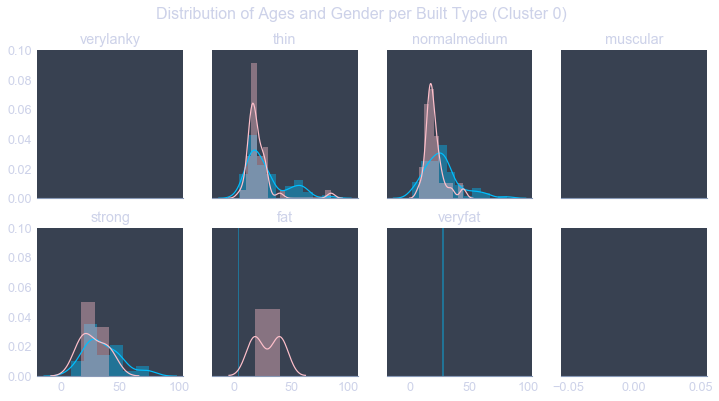

In [121]:
fig, axes = plt.subplots(2, 4, figsize=(12,6), sharex='col', sharey='row')
fig.suptitle('Distribution of Ages and Gender per Built Type (Cluster 0)', fontsize=16)
for i in range(7):
    mask_m = (df_k4['Gender']=='MALE') & (df_k4['Label']==0) & (df_k4['Built']==i+1)
    mask_f = (df_k4['Gender']=='FEMALE') & (df_k4['Label']==0) & (df_k4['Built']==i+1)
    sns.distplot(df['Age'][mask_m], color='deepskyblue', ax=axes[(i/4),(i%4)])
    sns.distplot(df['Age'][mask_f], color='pink', ax=axes[(i/4),(i%4)])
    axes[(i/4),(i%4)].set_title(inv_built_dict[i+1])
    axes[(i/4),(i%4)].set_xlabel('')
    axes[(i/4),(i%4)].set_ylim(0,.1)
    axes[(i/4),(i%4)].grid()
plt.grid(False)
sns.despine(left=True)

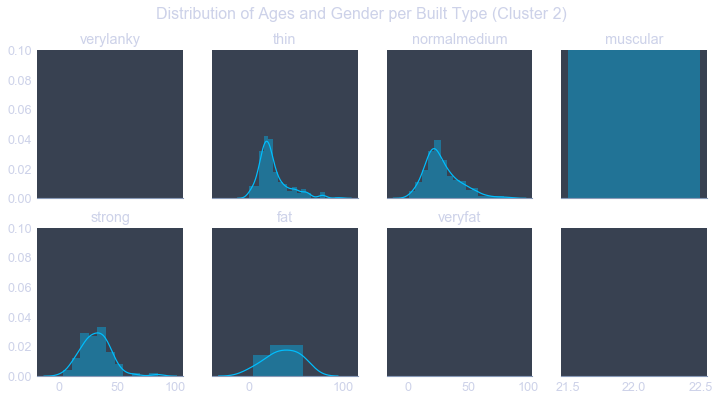

In [122]:
fig, axes = plt.subplots(2, 4, figsize=(12,6), sharex='col', sharey='row')
fig.suptitle('Distribution of Ages and Gender per Built Type (Cluster 2)', fontsize=16)
for i in range(7):
    mask_m = (df_k4['Gender']=='MALE') & (df_k4['Label']==1) & (df_k4['Built']==i+1)
    mask_f = (df_k4['Gender']=='FEMALE') & (df_k4['Label']==1) & (df_k4['Built']==i+1)
    sns.distplot(df['Age'][mask_m], color='deepskyblue', ax=axes[(i/4),(i%4)])
    sns.distplot(df['Age'][mask_f], color='pink', ax=axes[(i/4),(i%4)])
    axes[(i/4),(i%4)].set_title(inv_built_dict[i+1])
    axes[(i/4),(i%4)].set_xlabel('')
    axes[(i/4),(i%4)].set_ylim(0,.1)
    axes[(i/4),(i%4)].grid()
plt.grid(False)
sns.despine(left=True)

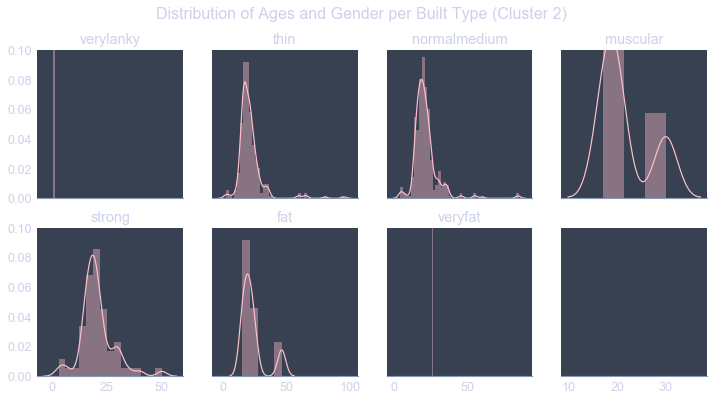

In [123]:
fig, axes = plt.subplots(2, 4, figsize=(12,6), sharex='col', sharey='row')
fig.suptitle('Distribution of Ages and Gender per Built Type (Cluster 2)', fontsize=16)
for i in range(7):
    mask_m = (df_k4['Gender']=='MALE') & (df_k4['Label']==2) & (df_k4['Built']==i+1)
    mask_f = (df_k4['Gender']=='FEMALE') & (df_k4['Label']==2) & (df_k4['Built']==i+1)
    sns.distplot(df['Age'][mask_m], color='deepskyblue', ax=axes[(i/4),(i%4)])
    sns.distplot(df['Age'][mask_f], color='pink', ax=axes[(i/4),(i%4)])
    axes[(i/4),(i%4)].set_title(inv_built_dict[i+1])
    axes[(i/4),(i%4)].set_xlabel('')
    axes[(i/4),(i%4)].set_ylim(0,.1)
    axes[(i/4),(i%4)].grid()
plt.grid(False)
sns.despine(left=True)

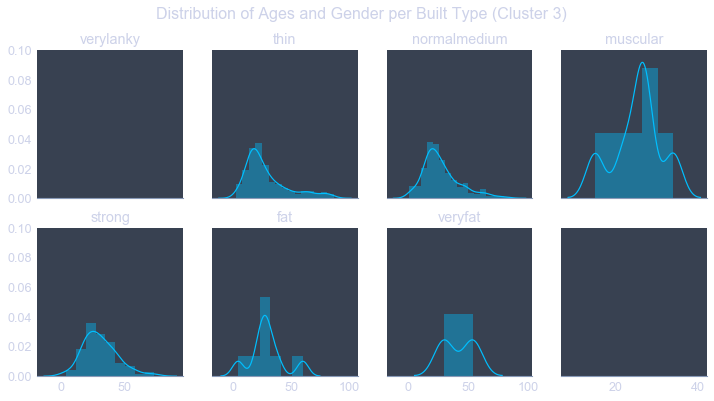

In [124]:
fig, axes = plt.subplots(2, 4, figsize=(12,6), sharex='col', sharey='row')
fig.suptitle('Distribution of Ages and Gender per Built Type (Cluster 3)', fontsize=16)
for i in range(7):
    mask_m = (df_k4['Gender']=='MALE') & (df_k4['Label']==3) & (df_k4['Built']==i+1)
    mask_f = (df_k4['Gender']=='FEMALE') & (df_k4['Label']==3) & (df_k4['Built']==i+1)
    sns.distplot(df['Age'][mask_m], color='deepskyblue', ax=axes[(i/4),(i%4)])
    sns.distplot(df['Age'][mask_f], color='pink', ax=axes[(i/4),(i%4)])
    axes[(i/4),(i%4)].set_title(inv_built_dict[i+1])
    axes[(i/4),(i%4)].set_xlabel('')
    axes[(i/4),(i%4)].set_ylim(0,.1)
    axes[(i/4),(i%4)].grid()
plt.grid(False)
sns.despine(left=True)

#### Height

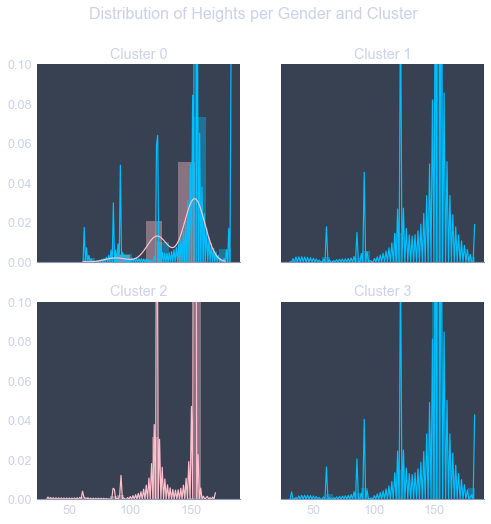

In [125]:
fig, axes = plt.subplots(2, 2, figsize=(8,8), sharex='col', sharey='row')
fig.suptitle('Distribution of Heights per Gender and Cluster', fontsize=16)
for i in clusters:
    mask_m = (df_k4['Gender']=='MALE') & (df_k4['Label']==i)
    mask_f = (df_k4['Gender']=='FEMALE') & (df_k4['Label']==i)
    sns.distplot(df['Height'][mask_m], color='deepskyblue', ax=axes[(i/2),(i%2)])
    sns.distplot(df['Height'][mask_f], color='pink', ax=axes[(i/2),(i%2)])
    axes[(i/2),(i%2)].set_title('Cluster '+str(i))
    axes[(i/2),(i%2)].set_xlabel('')
    axes[(i/2),(i%2)].set_ylim(0,.1)
    axes[(i/2),(i%2)].grid()
plt.grid(False)
sns.despine(left=True)

#### Railway Proximity

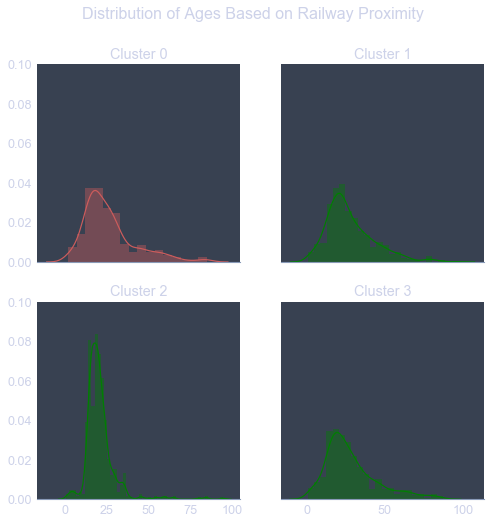

In [126]:
fig, axes = plt.subplots(2, 2, figsize=(8,8), sharex='col', sharey='row')
fig.suptitle('Distribution of Ages Based on Railway Proximity', fontsize=16)
for i in clusters:
    mask_t = (df_k4['Railway']==True) & (df_k4['Label']==i)
    mask_f = (df_k4['Railway']!=True) & (df_k4['Label']==i)
    sns.distplot(df['Age'][mask_t], color='indianred', ax=axes[(i/2),(i%2)])
    sns.distplot(df['Age'][mask_f], color='green', ax=axes[(i/2),(i%2)])
    axes[(i/2),(i%2)].set_title('Cluster '+str(i))
    axes[(i/2),(i%2)].set_xlabel('')
    axes[(i/2),(i%2)].set_ylim(0,.1)
    axes[(i/2),(i%2)].grid()
plt.grid(False)
sns.despine(left=True)

#### City-Relative Area

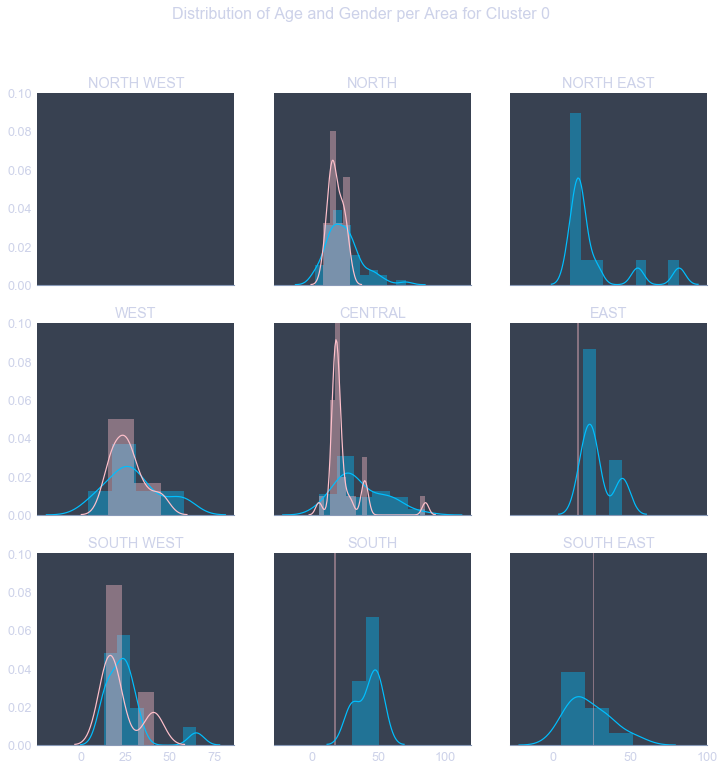

In [127]:
fig, axes = plt.subplots(3, 3, figsize=(12,12), sharex='col', sharey='row')
fig.suptitle('Distribution of Age and Gender per Area for Cluster 0', fontsize=16)
for i in range(9):
    area = areas[i]
    mask_m = (df_k4['Gender']=='MALE') & (df_k4['Label']==0) & (df_k4['Area']==area)
    mask_f = (df_k4['Gender']=='FEMALE') & (df_k4['Label']==0) & (df_k4['Area']==area)
    sns.distplot(df['Age'][mask_m], color='deepskyblue', ax=axes[(i/3),(i%3)])
    sns.distplot(df['Age'][mask_f], color='pink', ax=axes[(i/3),(i%3)])
    axes[(i/3),(i%3)].set_title(str(area))
    axes[(i/3),(i%3)].set_xlabel('')
    axes[(i/3),(i%3)].set_ylim(0,.1)
    axes[(i/3),(i%3)].grid()
plt.grid(False)
sns.despine(left=True)

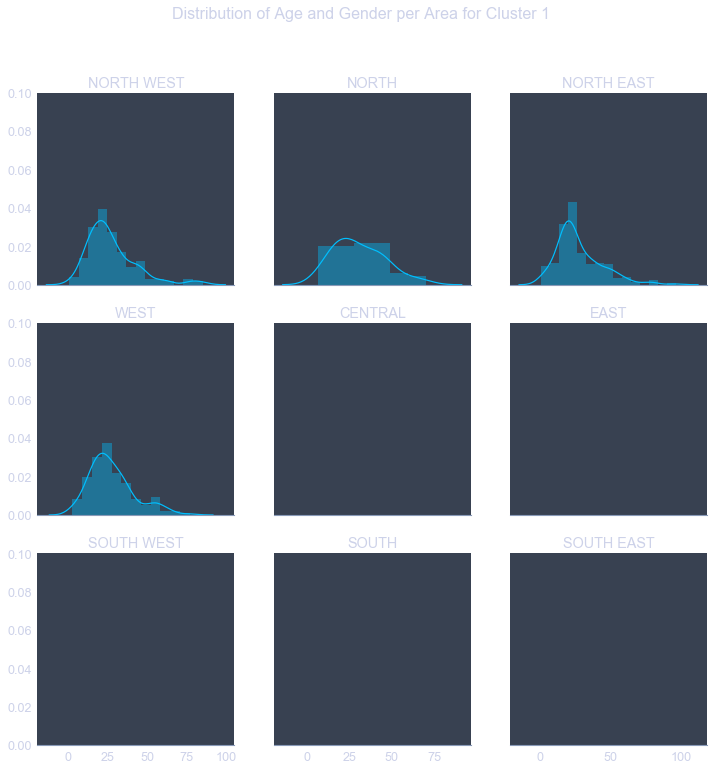

In [128]:
fig, axes = plt.subplots(3, 3, figsize=(12,12), sharex='col', sharey='row')
fig.suptitle('Distribution of Age and Gender per Area for Cluster 1', fontsize=16)
for i in range(9):
    area = areas[i]
    mask_m = (df_k4['Gender']=='MALE') & (df_k4['Label']==1) & (df_k4['Area']==area)
    mask_f = (df_k4['Gender']=='FEMALE') & (df_k4['Label']==1) & (df_k4['Area']==area)
    sns.distplot(df['Age'][mask_m], color='deepskyblue', ax=axes[(i/3),(i%3)])
    sns.distplot(df['Age'][mask_f], color='pink', ax=axes[(i/3),(i%3)])
    axes[(i/3),(i%3)].set_title(str(area))
    axes[(i/3),(i%3)].set_xlabel('')
    axes[(i/3),(i%3)].set_ylim(0,.1)
    axes[(i/3),(i%3)].grid()
plt.grid(False)
sns.despine(left=True)

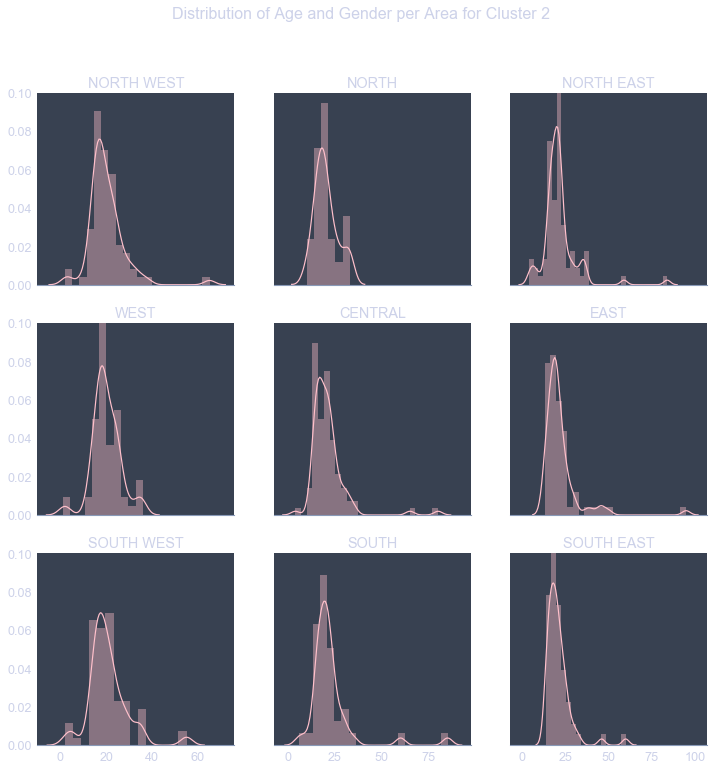

In [129]:
fig, axes = plt.subplots(3, 3, figsize=(12,12), sharex='col', sharey='row')
fig.suptitle('Distribution of Age and Gender per Area for Cluster 2', fontsize=16)
for i in range(9):
    area = areas[i]
    mask_m = (df_k4['Gender']=='MALE') & (df_k4['Label']==2) & (df_k4['Area']==area)
    mask_f = (df_k4['Gender']=='FEMALE') & (df_k4['Label']==2) & (df_k4['Area']==area)
    sns.distplot(df['Age'][mask_m], color='deepskyblue', ax=axes[(i/3),(i%3)])
    sns.distplot(df['Age'][mask_f], color='pink', ax=axes[(i/3),(i%3)])
    axes[(i/3),(i%3)].set_title(str(area))
    axes[(i/3),(i%3)].set_xlabel('')
    axes[(i/3),(i%3)].set_ylim(0,.1)
    axes[(i/3),(i%3)].grid()
plt.grid(False)
sns.despine(left=True)

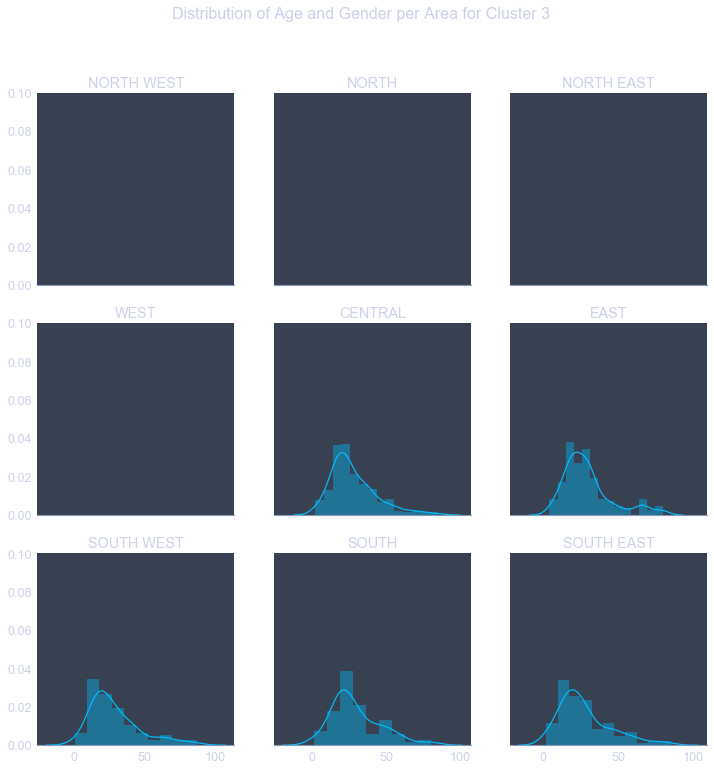

In [130]:
fig, axes = plt.subplots(3, 3, figsize=(12,12), sharex='col', sharey='row')
fig.suptitle('Distribution of Age and Gender per Area for Cluster 3', fontsize=16)
for i in range(9):
    area = areas[i]
    mask_m = (df_k4['Gender']=='MALE') & (df_k4['Label']==3) & (df_k4['Area']==area)
    mask_f = (df_k4['Gender']=='FEMALE') & (df_k4['Label']==3) & (df_k4['Area']==area)
    sns.distplot(df['Age'][mask_m], color='deepskyblue', ax=axes[(i/3),(i%3)])
    sns.distplot(df['Age'][mask_f], color='pink', ax=axes[(i/3),(i%3)])
    axes[(i/3),(i%3)].set_title(str(area))
    axes[(i/3),(i%3)].set_xlabel('')
    axes[(i/3),(i%3)].set_ylim(0,.1)
    axes[(i/3),(i%3)].grid()
plt.grid(False)
sns.despine(left=True)

#### Observation
<br>

| Cluster | Gender | Railway Proximity | Age and Area | Built |
| --- | --- | --- | --- | --- |
| Cluster 0 | Mixed | Close | Teenage males in eastern areas<br>Older males in southern & central areas<br>More senior instances<br>More male teens and young adults |
| Cluster 1 | Dominantly males | Far | Northern areas | More muscular males |
| Cluster 2 | Dominantly females | Far | Spread out similarly<br>Older females in southern areas | More muscular females |
| Cluster 3 | Dominantly males | Far | Southern & central areas | Heavier Males |



### Profiles

<br>

#### **Cluster 0 aka Families**
- has more teenage and senior people than other clusters
    * more male teenage disappearances in western and central areas
    * more senior male disappearances in southern and eastern areas
- living close to railways (likely to be closer to work and school and more expensive rent)
- less occupied by maintaining muscular bodies

<br>

#### **Cluster 1 aka Northern Young Muscles**
- living farther from railways
- more working age males than **Southern Elders**
- incidents only in northern areas

<br>

#### **Cluster 2 aka Young Working Women**
- living farther from railways (cheaper housing)
- taller women than those in **Families**
- younger than those in **Families**
- more female teen disappearance in western areas

<br>

#### **Cluster 3 aka Southern Elders**
- living farther from railways
- older than **Northern Young Muscles**
- incidents only in southern and central areas